<a href="https://colab.research.google.com/github/Diego875621/Data_Science/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

###Você sabe por que certas transações são bloqueadas pelo banco sem motivo algum aparente?



Hoje você verá uma análise de detecção de fraudes em cartões de banco! Algumas vezes o banco bloqueia certas transações ou até mesmo o cartão do usuário por causa da suspeita de fraude, ou seja como se alguém estivesse tentando lhe roubar dinheiro. Para isso, é essencial que os bancos tenham fortes sistemas informáticos, incluíndo operações e algoritmos que possam rapidamente identificar transações entre fraudosas e legítimas.


Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://raw.githubusercontent.com/Diego875621/Data_Science/main/Credit_Card_Fraud/Data_security_11.jpg" width="80%"></p>
<p align=center>Fonte: Freepik


Como cartões de crédito são cada vez mais fáceis no dias atuais, fica cada vez maior o risco de fraude envolvendo cartões. Uma vez que criminosos têm acesso ao cartão da vítima, isso poderá acaretar grandes prejuízos caso não seja detectado pela instituição financeira. 

No entanto, os bancos e *fintechs* querem detectar somente casos reais de fraude, ou seja verdadeiros positivos. Quando o banco bloqueia seu cartão de forma preventiva e na verdade a transação é legítima, isso é o que chamamos de falso positivo, o que provavelmente vai gerar estresse para o cliente.

Dessa forma, investir em Inteligência Artificical e Data Science na área de detecção de fraudes é algo que vem crescendo a cada ano. Pois, a partir de um grande volume de dados como base história, um algoritmo de machine learning um pouco mais aprimorado já pode representar uma grande economia de milhões. O desafio é esse, aprimorar algoritmos para evitar transações fraudulentas porém sem positivar para transações legítimas.


# Importando os Dados

Os dados utilizados nessa análise foram disponibilizados por certas empresas européias de cartão de crédito. Dentre quase 285 mil transações, 492 (0,17%) fraudes foram identificadas, dessa forma, é perceptível que o conjunto de dados está extremamente desbalanceado.


Além disso, as *features* são todas numéricas e descaracterizadas, para proteger os dados e a privacidade dos clientes. Dessa forma, os nomes das colunas se encontram como: $[V1, V2, ̇\dots, V28]$.

* `Amount` = Montante da transação em dólares
* `Time` = Número de segundos decorrido entre dada transação e a primeira do dataset
* `Class` = 1 Transação Fraudulenta e 0 Transação Legítima
* [`V1` - `V28`] = Dados descaracterizados

<p align=center>
<img src="https://github.com/Diego875621/Data_Science/blob/main/Credit_Card_Fraud/clay-banks-tgquMvhNLc4-unsplash.jpg?raw=true" width="30%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), é informado que as variáveis do dataset foram redimensionados por uma técnica chamada Análise de Componentes Principais (*Principal Component Analysis* - PCA)
Essa técnica reduz a dimensionalidade enquanto mantém o maior número de informações, encontrando um conjunto de recursos (**componentes**), que nesse caso, os componentes transformados são as próprias colunas.

Vamos iniciar importando todas as bibliotecas necessárias para a análise e em seguida verificar as entradas e a extensão do dataset, e posterior análise estatística.


In [1]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches

# Bibliotecas de classificação

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import collections

# Outras bibliotecas

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")


%matplotlib inline

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [2]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe

df = pd.read_csv(file_path)

print("Tamanho do Dataset:\n", df.shape)

# Vamos ver a cara do nosso dataframe
df

Tamanho do Dataset:
 (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Como observado, esse dataset é basicamente composto por várias variáveis categóricas, isso é, sem nenhuma descrição, pois trata-se de dado bancários e deve haver sigilo das informações pessoais. Somente as variáveis Amount e Class são descritíveis, estas se tratando do valor em dólares e se a operação foi fraudosa [1] ou não [0], respectivamente.

In [3]:
# Somatório dos valores ausentes
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Esse dataset não apresenta valores ausentes (Na) então não teremos nenhum problema em relação à limpeza de dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Descrição estatística das 3 principais variáveis com descrição
df[['Amount', 'Class', 'Time']].describe()

,Amount,Class,Time
count,284807.000000,284807.000000,284807.000000
mean,88.349619,0.001727,94813.859575
std,250.120109,0.041527,47488.145955
min,0.000000,0.000000,0.000000
25%,5.600000,0.000000,54201.500000
50%,22.000000,0.000000,84692.000000
75%,77.165000,0.000000,139320.500000
max,25691.160000,1.000000,172792.000000


O resumo estatístico acima nos informa que o montante de transações (`Amount`) tem um alto desvio padrão (250.12), com aparente alta quantidade de outliers e dados desbalanceados, pois 75% dos seus valores estão 0-77, porém a máxima é de 25691, com uma média de 88 dólares.

Já os valores do tipo de transação `Class` tem um desvio padrão baixíssimo, com 75% mostrando valor 0 indicando que 0 é a classe predominante, ou seja transações não fraudulentas. Já `Time` está totalmente variável.

In [6]:
# Número de Transações Não Fraudosas e Transações Fraudosas
print(df[['Class']].value_counts(ascending=False), '\n')

NoF = round(df['Class'].value_counts()[0]/len(df) * 100, 2)
IsF = round(df['Class'].value_counts()[1]/len(df) * 100, 2)

print(f'Transações Não Fraudosas: {NoF} % do dataset')
print(f'Transações Fraudosas: {IsF} % do dataset')

Class
0        284315
1           492
dtype: int64 

Transações Não Fraudosas: 99.83 % do dataset
Transações Fraudosas: 0.17 % do dataset


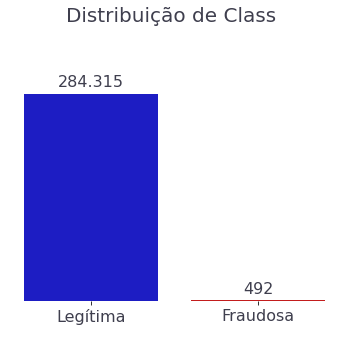

In [7]:
# Distribuição das transações ('Class')
colors = ["#0101DF", "#DF0101"]
fig, ax = plt.subplots()
sns.countplot('Class', data=df, palette=colors);

plt.title('Distribuição de Class \n',  pad=40, fontdict={'fontsize':20}, color='#3f3f4e');
ax.set_frame_on(False)
ax.get_yaxis().set_visible(False)
ax.set_xticklabels(['Legítima', 'Fraudosa'], fontsize=16, color='#3f3f4e')
ax.set_xlabel(' ')


for hist in ax.patches:
  ax.text(hist.get_x() + hist.get_width() / 2,
          hist.get_height() + 10000,
          '{:,}'.format(int(hist.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=16 , color='#3f3f4e')

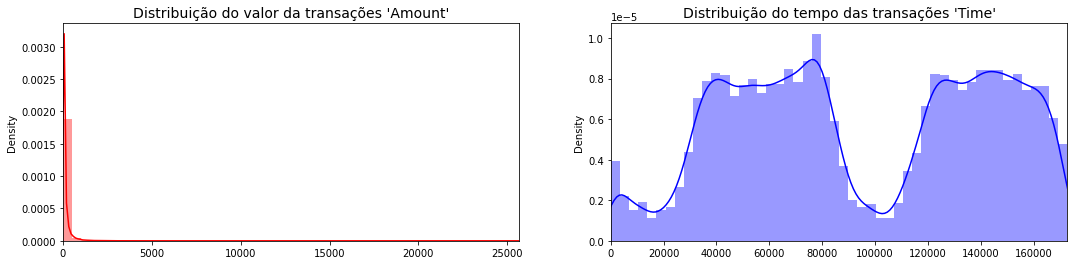

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title("Distribuição do valor da transações 'Amount'", fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title("Distribuição do tempo das transações 'Time'", fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

Os histogramas da densidade de Amount e Time acima nos informa valores extremos, no qual a escala de ambos estão muito distorcidas. Assim, será preciso balancear essas variáveis.

# **Balanceamento das variáveis**


<p align=center>
<img src="https://raw.githubusercontent.com/Diego875621/Data_Science/main/Credit_Card_Fraud/scale.jpg" width="60%"></p>
<p align=center>Fonte: Freepik

A partir das informações extraídas, podemos ver que:

* não temos que lidar com valores ausentes nesse dataset.

* A média dos valores das transações é baixo, sendo aproximadamente USD 88. 

* Das transações, 492 (0,17%) são fraudosas enquanto 284315 (99,8%) são normais. 

* As escalas de `Time` e `Amount` precisam ser pradonizadas

Ou seja, o dataset está extremamente desbalanceado, e se usarmos dessa forma, os algoritmos vão sofrer "sobreajuste" ("overfit") gerando vários erros além de que não é possível enxergar como as variáveis podem ser correlacionadas, mesmo que as descrições da maioria seja somente "V", pode ser que seja útil seus valores ao correlacionar com outros dados. Através dos gráficos de distribuição de `Amount` e `Time` podemos ver que o conjuto de dados está bastante distorcido.
Por isso teremos que balancear o dataset.

Se tem algumas formas para se fazer isso, nesta análise, usaremos um sub-sample, ou seja, será criado um novo dataframe em que o dataset conterá uma proporção de 50%/50% de transações fraudulentas e não fraudulentas.

Para isso, será usado o `RobustScaler` que além de normalizar as escalas, é mais robusto à Outliers que o método convencional `StandartScaler`. Então `Amount` e `Time` serão substituídos por `scaled_amount` e `scaled_time`, respectivamente.

In [9]:
# Balanceando as colunas 'Amount' e 'Time'
# RobustScaler é menos propenso à outliers

from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# Excluindo do dataframe os valores desbalanceados
df.drop(['Time','Amount'], axis = 1, inplace=True)

In [10]:
# Inserindo os valores balanceados no dataframe

# Definindo as colunas
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

# Movendo - Retirando das últimas colunas do dataframe e 

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# Inserindo nas primeiras colunas do dataframe

df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


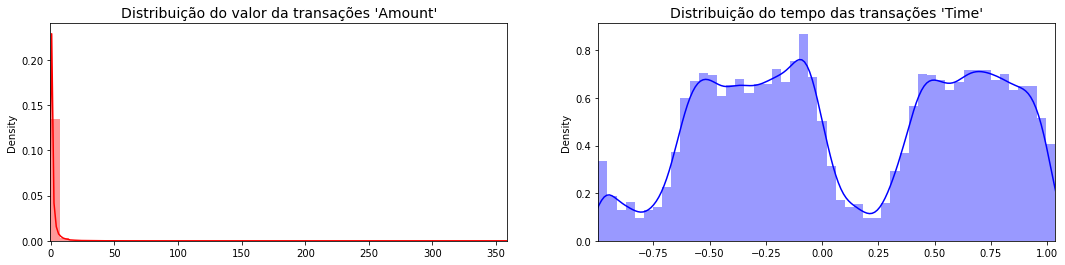

In [11]:
# Plot das variáveis balanceadas ('scaled_amount' e 'scaled_time')
fig, ax = plt.subplots(1, 2, figsize=(18,4))

scaled_amount_val = df['scaled_amount'].values
scaled_time_val = df['scaled_time'].values

sns.distplot(scaled_amount_val, ax=ax[0], color='r')
ax[0].set_title("Distribuição do valor da transações 'Amount'", fontsize=14)
ax[0].set_xlim([min(scaled_amount_val), max(scaled_amount_val)])

sns.distplot(scaled_time_val, ax=ax[1], color='b')
ax[1].set_title("Distribuição do tempo das transações 'Time'", fontsize=14)
ax[1].set_xlim([min(scaled_time_val), max(scaled_time_val)])

plt.show()

Quando comparamos os gráficos, percebemos que as escalas estão com ordens de grandeza mais uniformes. As variaveis `Amount` e `Time` foram excluídas do dataframe e substituídas por suas respectivas versões balanceadas: `scaled_amount` e `scaled_time`. 

Em seguida, vamos separar o feature matrix e target vector (`Class`) para a construção de modelos de teste e treino.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Separando feature matrix e target vector
X = df.drop('Class', axis=1)
y = df['Class']

# **Random Under-Sampling**

<p align=center>
<img src="https://raw.githubusercontent.com/Diego875621/Data_Science/main/Credit_Card_Fraud/filter.jpg" width="30%"></p>
<p align=center>Fonte: Freepik

Essa técnica consiste na remoção aleatórica de dados para se obter um dataset balanceado e assim evitar o overfitting. Há algumas maneiras de se fazer o Random Under-Sampling, sendo possível usar a biblioteca `imblearn` ou através do Pandas, e nesse caso será usado a última.

Dessa forma, como há muito mais transações não fraudosas [0] do que fraudosas [1], vamos retirar uma fração de [0] equivalente à [1]. 

Então como temos 492 dados de transações com fraudes, randomicamente será selecionado 492 de transações sem fraudes. Após feita a seleção, as duas frações serão unidas em um só novo dataframe.

In [13]:
# Selecionando uma fração aleatória do dataset
df = df.sample(frac=1)

# Definindo 'class' como dataframes específicos
fraud_df = df.loc[df['Class'] == 1]
no_fraud_df = df.loc[df['Class'] == 0][:492]

# Concatenando as duas partes de 'class' em um dataframe novo
normal_distributed_df = pd.concat([fraud_df, no_fraud_df])

# Normalizando a distribuição do novo dataframe
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
84855,-0.297771,-0.284331,-1.369930,1.153565,1.306309,-0.539941,0.681962,-0.928918,0.958957,-0.488347,...,-0.002044,-0.266784,-0.701456,-0.144606,-0.014339,-0.120492,-0.102367,-0.585258,0.092814,0
147548,-0.290924,0.046758,-3.859881,2.632881,-5.264265,3.446113,-0.675231,-1.904959,-3.291041,-0.985766,...,-0.178626,1.664119,0.785075,0.068412,0.778961,-0.863166,-0.006810,-1.065734,1.773326,1
215648,0.551107,0.651641,-0.197200,1.338995,0.351561,2.886017,0.935157,-0.155005,1.458615,-0.236100,...,-0.282050,0.442181,1.339599,-0.231229,0.017973,0.165807,0.273595,-0.072849,0.008487,0
77348,-0.307273,-0.325251,-1.271244,2.462675,-2.851395,2.324480,-1.372245,-0.948196,-3.065234,1.166927,...,0.560478,0.652941,0.081931,-0.221348,-0.523582,0.224228,0.756335,0.632800,0.250187,1
69498,-0.195626,-0.367027,0.385108,1.217620,-1.953872,2.087076,-1.144225,-0.576888,-2.582865,0.643230,...,0.380545,0.594623,0.372144,-0.310456,-0.624065,0.840216,-0.159452,0.599482,0.288916,1


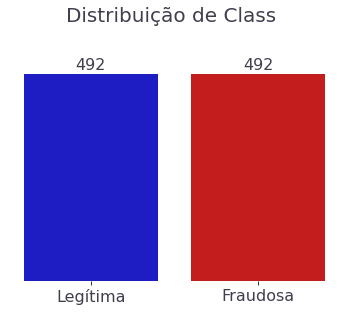

In [14]:
# Distribuição das transações ('Class')
colors = ["#0101DF", "#DF0101"]
fig, ax = plt.subplots()
sns.countplot('Class', data=new_df, palette=colors);

plt.title('Distribuição de Class \n',  pad=20, fontdict={'fontsize':20}, color='#3f3f4e');
ax.set_frame_on(False)
ax.get_yaxis().set_visible(False)
ax.set_xticklabels(['Legítima', 'Fraudosa'], fontsize=16, color='#3f3f4e')
ax.set_xlabel(' ')


for hist in ax.patches:
  ax.text(hist.get_x() + hist.get_width() / 2,
          hist.get_height() + 10,
          '{:,}'.format(int(hist.get_height())),
          ha = 'center',
          fontsize=16 , color='#3f3f4e')

# **Correlações**

Abaixo podemos ver o heatmap das correlações entre as variáveis do dataset original e o dataset depois de normalizado. Uma grade diferença é perceptível, pois antes da limpeza, praticamente não tínhamos nenhuma correlação significativa. Já após a limpeza podem perceber mais claramente correlações entre as variáveis sem descrição em comparação com `Class`.


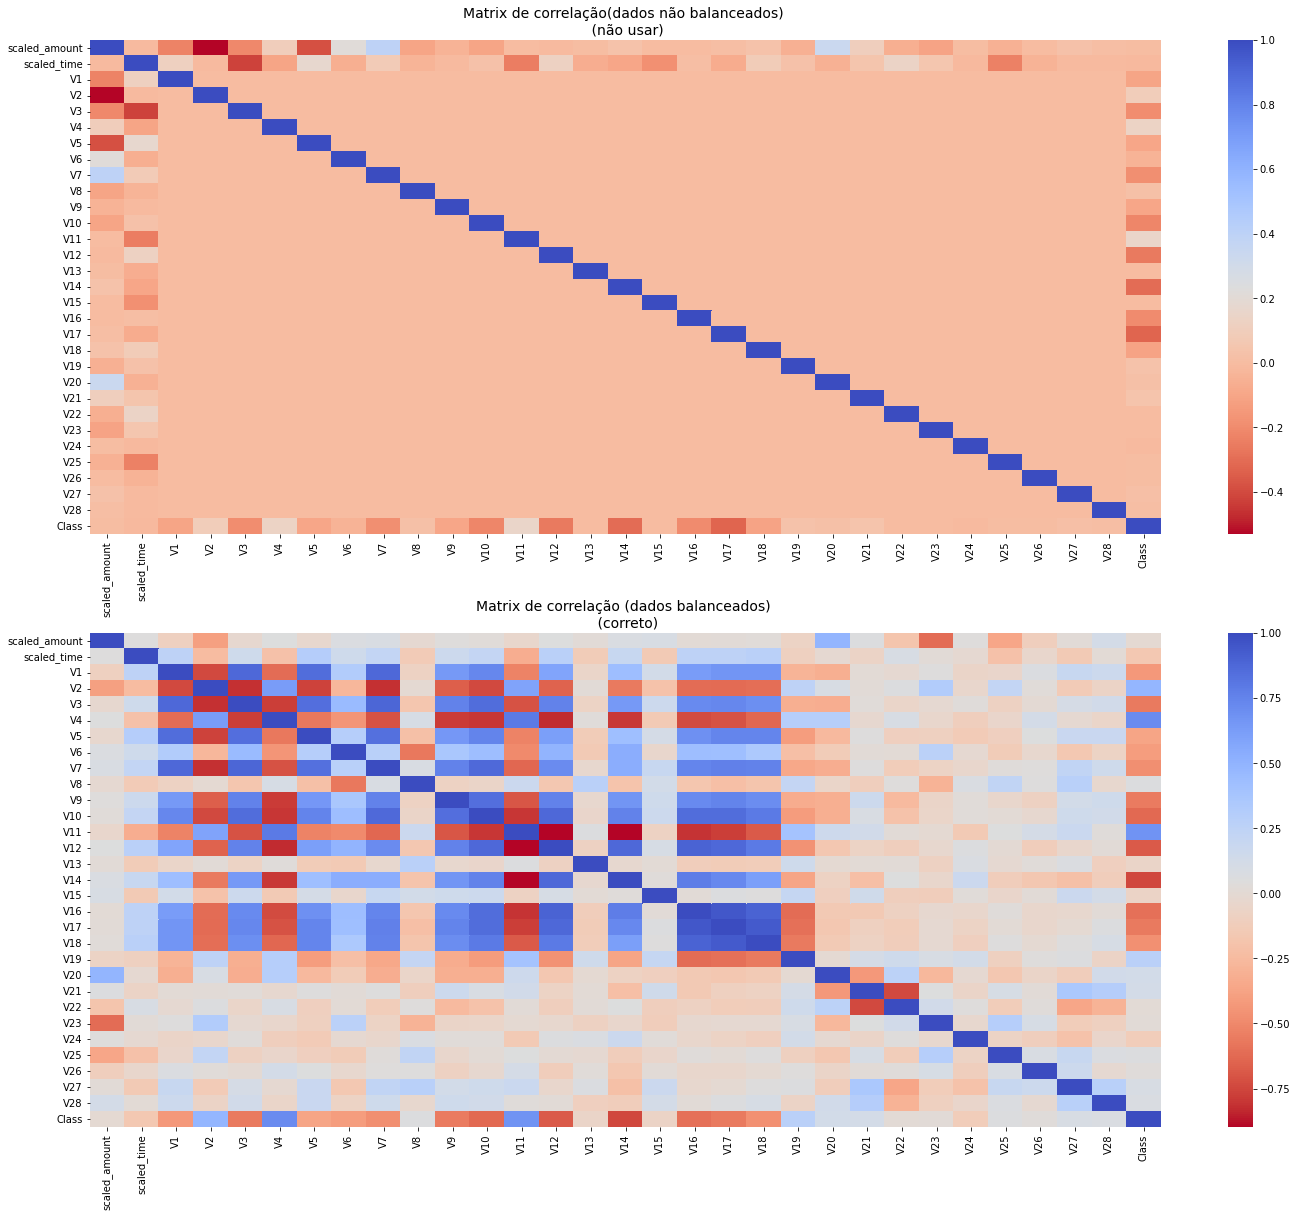

In [15]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Matrix de correlação(dados não balanceados) \n (não usar)", fontsize=14)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr,cmap='coolwarm_r', annot_kws={'size':20})
ax2.set_title('Matrix de correlação (dados balanceados) \n (correto)', fontsize=14)
plt.show()

In [16]:
# Correlação entre as principais variáveis e Class
new_df[['V17', 'V14', 'V12', 'V10','V4', 'V11', 'Class']].corr()

,V17,V14,V12,V10,V4,V11,Class
V17,1.000000,0.730454,0.876735,0.851726,-0.711039,-0.774431,-0.559860
V14,0.730454,1.000000,0.880711,0.756386,-0.794071,-0.892795,-0.748644
V12,0.876735,0.880711,1.000000,0.879294,-0.831253,-0.898434,-0.683036
V10,0.851726,0.756386,0.879294,1.000000,-0.799562,-0.801652,-0.629208
V4,-0.711039,-0.794071,-0.831253,-0.799562,1.000000,0.793824,0.717222
V11,-0.774431,-0.892795,-0.898434,-0.801652,0.793824,1.000000,0.679299
Class,-0.559860,-0.748644,-0.683036,-0.629208,0.717222,0.679299,1.000000


Com as informações da tabela acima juntamente com o heatmap, podemos apontar:

* correlação negativa de `Class` com `V10`, `V12`, `V14` e `V17`. Então, quanto menor o valor desses "V" há maior tendência de mudança de `Class`

* correlação positiva de `Class` com `V4` e `V11`. Logo, quanto maior o valor desses "V" há maior tendência de mudança de `Class`.

Abaixo será mostrado os gráficos de caixa (boxplot) de Class com (-) `V12`, `V14` e (+) `V4` e `V11`.

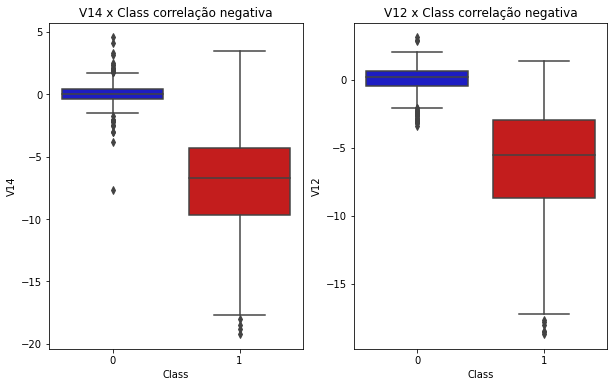

In [17]:
# Correlações negativas - quanto menor o valor desses "V" há maior tendência de transações fraudosas

f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,6))

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=ax1)
ax1.set_title('V14 x Class correlação negativa')

sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=ax2)
ax2.set_title('V12 x Class correlação negativa')

plt.show()

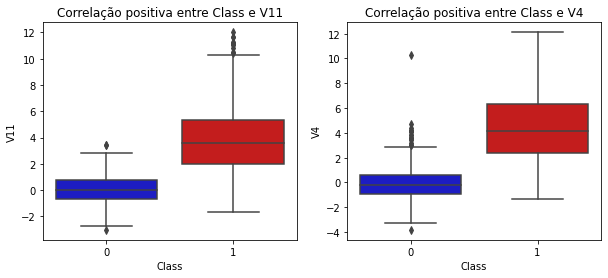

In [18]:
# Correlações Positivas - quanto maior o valor desses "V" há maior tendência de transações fraudosas

f, axes = plt.subplots(ncols=2, figsize=(10,4))

sns.boxplot(x='Class', y='V11', data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('Correlação positiva entre Class e V11')

sns.boxplot(x='Class', y='V4', data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('Correlação positiva entre Class e V4')

plt.show()

# **Redução de Dimensionalidade e Agrupamento**



<p align=center>
<img src="https://raw.githubusercontent.com/Diego875621/Data_Science/main/Credit_Card_Fraud/cube.jpg" width="30%"></p> 
<p align=center>Fonte: Freepik

Com a redução de Dimensionalidade e agrupamento, podemos dar uma olhada qualitativa na similaridade dos dados e se podem formar agrupamentos. Abaixo será usado 3 ferramentas: `T-SNE`, `PCA` e `Truncated SVD`, todas as 3 são transformadoras de redução de dimensionalidade, e os resultados serão será avaliados.


In [19]:
# Redução de Dimensionalidade e Clustering com T-SNE, PCA e Truncated SVD
X = new_df.drop('Class', axis = 1)
y = new_df['Class']

# T-SNE
tsne = TSNE(random_state=42)
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

# PCA
X_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)

# Truncated SVD
X_svd = TruncatedSVD(n_components=2, random_state=42).fit_transform(X.values)

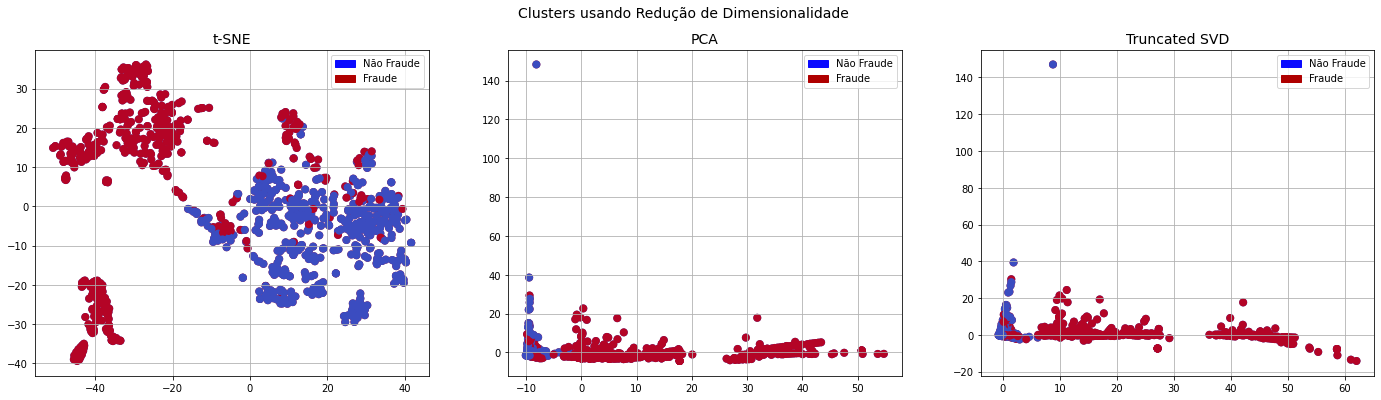

In [20]:
# Plot das 3 reduções de dimensionalidade

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
f.suptitle('Clusters usando Redução de Dimensionalidade', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='Não Fraude')
red_patch = mpatches.Patch(color='#AF0000', label='Fraude')

# t-SNE scatter plot
ax1.scatter(X_tsne[:,0], X_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Não Fraude', linewidths=2)
ax1.scatter(X_tsne[:,0], X_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraude', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_pca[:,0], X_pca[:,1], c=(y == 0), cmap='coolwarm', label='Não Fraude', linewidths=2)
ax2.scatter(X_pca[:,0], X_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraude', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_svd[:,0], X_svd[:,1], c=(y == 0), cmap='coolwarm', label='Não Fraude', linewidths=2)
ax3.scatter(X_svd[:,0], X_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraude', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

Em relação aos outros transformadores, o T-SNE foi capaz de agrupar e separar melhor os grupos de fraude e não fraude de `Class` em relação ao PCA e Truncated SVD

# **Modelos Classificadores**

Testaremos 4 algoritmos classificadores - Regressão Logística, K-Nearest Neighboors (K-NN), Support Machine Classifier e Árvore de decisão - para ver qual é o desempenho de cada e escolher qual tem maior eficiência para o nosso caso.

Primeiro o dataset será dividido entre feature matrix (X) e target vector (y) no qual y será a coluna das transações (`Class`). 

A estratificação (Stratify), que é processo de dividir o conjunto de dados em subgrupos antes da amostragem, será positiva nesse caso. O embaralhamento dos dados (Shuffle) antes de divisão será usado também, o qual vai permitir uma divisão mais uniforme e com menor chance de pré-determinação das posições dos elementos.

Afim de facilitar a escolha dos hyperparametros de cada modelo, será usado `GridSearchCV` que é um função do Sklearn que seleciona e faz validação cruzada nos parâmetros específicos de cada classificador

In [21]:
# Divisão do Dataset entre features e target
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [22]:
# Divisão entre dados de treino e dados de teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y, shuffle=True)

In [23]:
# Classificadores usados
classifiers = {
    "LogRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier()    
}

In [24]:
# Validação cruzada
print("Pontuação de treinamento dos classificadores\n")

for key, classifier in classifiers.items():
  classifier.fit(X_train, y_train)
  training_score = cross_val_score(classifier, X_train, y_train, cv=5)
  print("Classificadores: ", classifier.__class__.__name__, "-", round(training_score.mean(), 2) * 100, "% Precisão")

Pontuação de treinamento dos classificadores

Classificadores:  LogisticRegression - 94.0 % Precisão
Classificadores:  KNeighborsClassifier - 93.0 % Precisão
Classificadores:  SVC - 93.0 % Precisão
Classificadores:  DecisionTreeClassifier - 91.0 % Precisão


In [25]:
# GridSearchCV para selecionar os melhores hyperparâmetros de cada modelo
# Regressão Logística

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.1, 1, 10, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(random_state=42), log_reg_params)
grid_log_reg.fit(X_train, y_train)

log_reg = grid_log_reg.best_estimator_

log_reg

LogisticRegression(C=0.1, random_state=42)

In [26]:
# K-NN

knears_params = {"n_neighbors": list(range(2, 5, 1)), 
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)

knears_neighbors = grid_knears.best_estimator_

knears_neighbors

KNeighborsClassifier(n_neighbors=3)

In [27]:
# SVC

svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

svc = grid_svc.best_estimator_

svc

SVC(C=0.5, kernel='linear')

In [43]:
# Árvore

tree_params = {'criterion': ['gini', 'entropy'], 
               'max_depth': list(range(2, 3, 1)),
               'ccp_alpha': np.arange(0.001, 1, 0.1).tolist()}

grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=0), tree_params)
grid_tree.fit(X_train, y_train)

tree = grid_tree.best_estimator_

tree

DecisionTreeClassifier(ccp_alpha=0.101, max_depth=2, random_state=0)

In [29]:
# Pontuação da Validação Cruzada de cada modelo
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Pontuação Validação Cruzada - Regressão Logística:',
      round(log_reg_score.mean() * 100, 2), '%')

knears_neighbors_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Pontuação Validação Cruzada - K-NearsNeighbors:',
      round(knears_neighbors_score.mean() * 100, 2), '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Pontuação Validação Cruzada - SVC:',
      round(svc_score.mean() * 100, 2), '%')

tree_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Pontuação Validação Cruzada - Árvore:',
      round(tree_score.mean() * 100, 2), '%')

Pontuação Validação Cruzada - Regressão Logística: 94.4 %
Pontuação Validação Cruzada - K-NearsNeighbors: 94.41 %
Pontuação Validação Cruzada - SVC: 93.39 %
Pontuação Validação Cruzada - Árvore: 93.39 %


Após a escolha dos hyperparâmetros, é feita uma validação cruzada de cada classificador, e o que tem melhor desempenho é a Regressão Logística. Abaixo está o plot das curvas de aprendizado dos classificadores.

In [30]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

# Plot das curvas de aprendizados

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
  f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,14), sharey=True)
  if ylim is not None:
    plt.ylim(*ylim)

    # 1 Estimator

    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax1.fill_between(train_sizes, train_scores_mean - test_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', label='Training score', color="#ff9124")
    ax1.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation score', color="#2492ff",)
    
    ax1.set_title('Curva de aprendizado - Regressão Logística')
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend()
    
    # 2 Estimator

    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax2.fill_between(train_sizes, train_scores_mean - test_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', label='Training score', color="#ff9124")
    ax2.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation score', color="#2492ff",)
    
    ax2.set_title('Curva de aprendizado - K-NN')
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend()

    # 3 Estimator

    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax3.fill_between(train_sizes, train_scores_mean - test_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', label='Training score', color="#ff9124")
    ax3.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation score', color="#2492ff",)

    ax3.set_title('Curva de aprendizado - SVC')
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend()

    # 4 Estimador

    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax4.fill_between(train_sizes, train_scores_mean - test_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', label='Training score', color="#ff9124")
    ax4.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation score', color="#2492ff",)
    ax4.set_title('Curva de aprendizado - Árvore')
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend()
    return plt


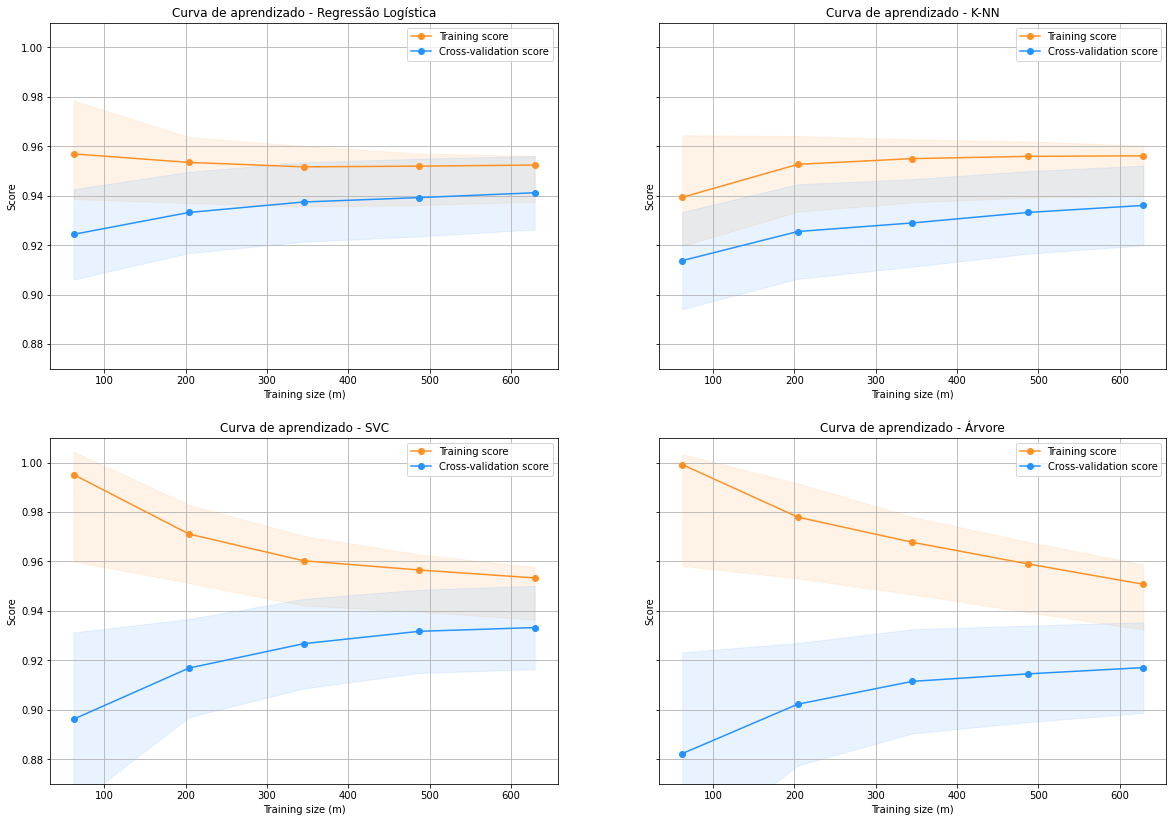

In [31]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4);

Com as curvas de aprendizado podemos visualizar se os modelos tendem a:

* overfit - alta variação, quanto maior a lacuna entre a pontuação de validação cruzada e a pontuação do treinamento, maior tendência de overfit

* underfit - alta desvio (viés), se ambas as pontuações forem baixas, maior será a tendência para underfit

Logo, quanto maior as pontuações e menor a lacuna entre pontuações, melhor! E nessa análise, a regressão logística parece ter um desempenho melhor. Já a árvore de decisão e a SVC aparentam ter um certo overfit.

In [32]:
# Validação cruzada e curva ROC
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                                 method='decision_function')

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                                 method='decision_function')

tree_pred = cross_val_predict(tree, X_train, y_train, cv=5,)

In [33]:
# Pontuação ROC para cada classificador
from sklearn.metrics import roc_auc_score

print('Curva ROC          Pontuação (%)\n')
print(f'Regressão Logística:  {roc_auc_score(y_train, log_reg_pred):.3f}')
print(f'K-NN:  {roc_auc_score(y_train, knears_pred):.3f}')
print(f'SVC Neighbors:  {roc_auc_score(y_train, svc_pred):.3f}')
print(f'Árvore de decisão:  {roc_auc_score(y_train, tree_pred):.3f}')

Curva ROC          Pontuação (%)

Regressão Logística:  0.977
K-NN:  0.944
SVC Neighbors:  0.971
Árvore de decisão:  0.935


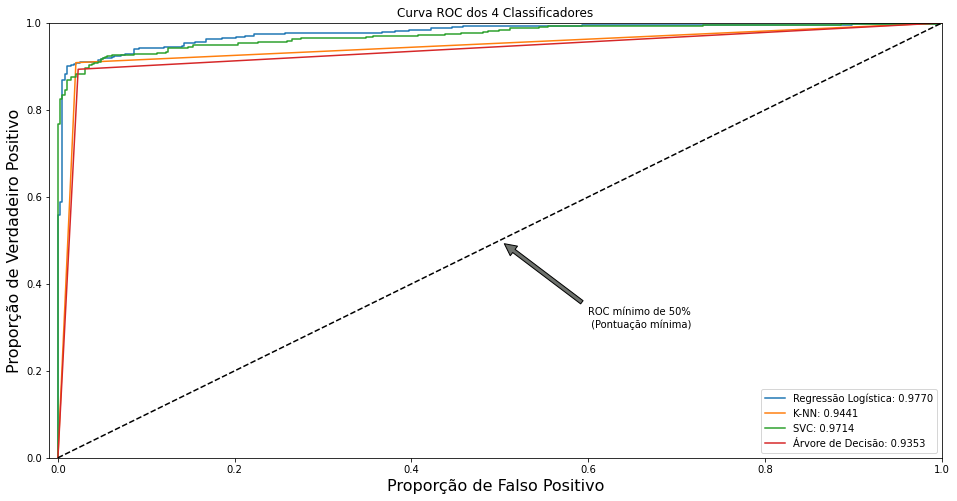

In [34]:
# Plot da Curva Roc entre os 4 modelos

log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knears_fpr, knears_tpr, knears_thresold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_thresold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_thresold = roc_curve(y_train, tree_pred)

def graph_roc_curve_multiple(log_pfr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_ptr):
  plt.figure(figsize=(16,8))
  plt.title('Curva ROC dos 4 Classificadores')
  plt.plot(log_fpr, log_tpr, label='Regressão Logística: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
  plt.plot(knears_fpr, knears_tpr, label='K-NN: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
  plt.plot(svc_fpr, svc_tpr, label='SVC: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
  plt.plot(tree_fpr, tree_tpr, label='Árvore de Decisão: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([-0.01, 1, 0, 1])
  plt.xlabel("Proporção de Falso Positivo", fontsize=16)
  plt.ylabel("Proporção de Verdadeiro Positivo", fontsize=16)
  plt.annotate('ROC mínimo de 50% \n (Pontuação mínima)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
               arrowprops=dict(facecolor='#6E726D', shrink=0.05))
  plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr,
                         knears_fpr, knears_tpr,
                         svc_fpr, svc_tpr,
                         tree_fpr, tree_tpr)

plt.show()

# Métricas

As métricas dos modelos classificatórios incluém:

###Matrizes de confusão

* TP - Positivos Verdadeiros - Previsão positiva e verdadeira. O caso de fraude é detectado como fraude (corretamente)


* TN - Negativos verdadeiros - Previsão negativa e verdadeira. Uma transação legítima é detectado como legítima (corretamente)


* FP - Falsos positivos - Previsão positiva e falsa. Uma transação legítima é detectada como fraude (incorreta)


* FN - Falsos negativos - Previsão negativa e falsa. Uma transação fraudosa é detectada como legítima (incorreta)

###Relatório de classificação 

Já no relatório de classificação é encontrado:

* Precision (P) - Porcentagem de classificações corretas (P = TP/TP+FP)

* Recall (R) - Porcentagem de classificações corretas em relação aos falsos negativos (R = TP/TP+FN)

* F1-Score = É a média harmônica entre Precision e Recall (F1 = 2(P*R)/(P+R)

### ROC

A curva característica de funcionamento do receptor ou Curva ROC (*receiver operating characteristic curve*), avalia taxa de verdadeiros positivos em relação aos falsos positivos. Dessa medida por ser criada a AUC (*Area Under the Curve*).

Nesse exemplo, é observado que quando os positivos verdadeiros estão abaixo de 0.9 há uma baixa taxa de falsos positivos. Acima desse valor todos os modelos parecem perder eficiência. O que teve melhor desempenho nessa métrica foi a Regressão Logística.

# **Regressão Logística**

Abaixo vamos avaliar como a regressão logística desempenha segundo a curva ROC, a matrix de confusão e o relatório de classificação.

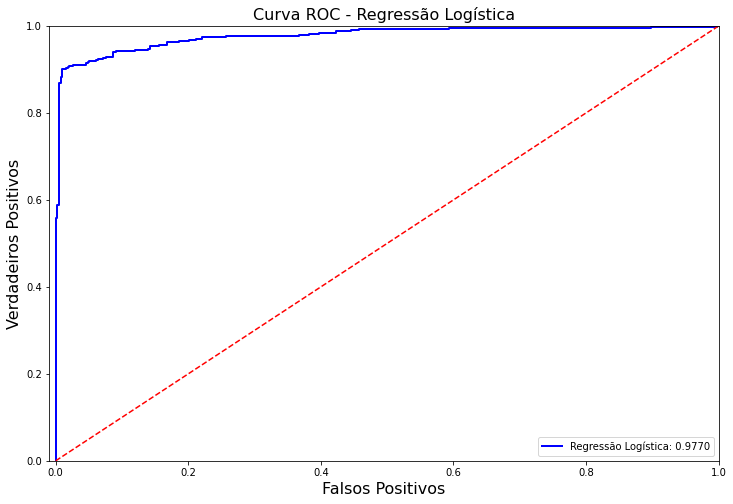

In [35]:
# Regressão Logística - Curva ROC 
def logistic_roc_curve(log_fpr, log_tpr):
  plt.figure(figsize=(12,8))
  plt.plot(log_fpr, log_tpr, 'b-', linewidth=2, label='Regressão Logística: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
  plt.plot([0, 1], [0, 1], 'r--')
  plt.title('Curva ROC - Regressão Logística', fontsize=16)
  plt.xlabel('Falsos Positivos', fontsize=16)
  plt.ylabel('Verdadeiros Positivos', fontsize=16)
  plt.legend()
  plt.axis([-0.01, 1, 0, 1])

logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [36]:
# Predição - Regressão Logística
y_pred = log_reg.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        99
           1       0.97      0.90      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197
 



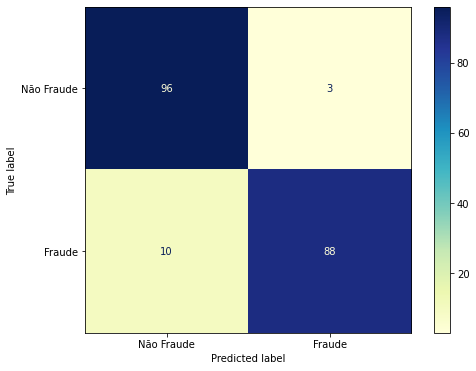

In [37]:
# Relatório de classificação - Regressão Logística
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred), '\n')

# Confusion Matrix plot
from sklearn.metrics import ConfusionMatrixDisplay
f, ax = plt.subplots(figsize=(8,6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="YlGnBu", 
                                        display_labels=('Não Fraude', 'Fraude'),
                                        ax=ax);

#outra forma: sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu");

# **Árvore de Decisão**

Vamos dar uma olhada nas métricas da Árvore de Decisão e como ela desempenharia nesse dataset.

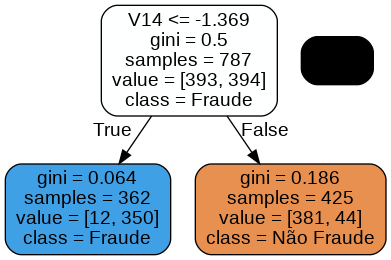

In [44]:
# Plot da Árvore de Decisão
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot = export_graphviz(tree, filled=True, rounded=True,
                      feature_names=X.columns, class_names=['Não Fraude', 'Fraude'])

graph = pydotplus.graph_from_dot_data(dot)
Image(graph.create_png())

In [39]:
# Predição - Árvore de Decisão
y_pred_tree = tree.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        99
           1       0.94      0.91      0.92        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197
 



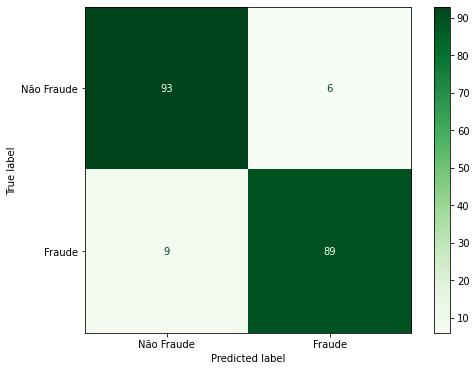

In [45]:
# Relatório de classificação - Árvore de Decisão
print(classification_report(y_test, y_pred_tree), '\n')

# Confusion Matrix plot
from sklearn.metrics import ConfusionMatrixDisplay
f, ax = plt.subplots(figsize=(8,6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, cmap="Greens", 
                                        display_labels=('Não Fraude', 'Fraude'),
                                        ax=ax);

Apesar de aparente tanto a regressão logística e a árvore de decisão terem métricas com valores semelhantes, de acordo com os teste de validação cruzada anteriores, a regressão logística parece acertar mais resultados e ter menor *overfit* do que os outros modelos.

# **Conclusões**

* A partir da análise inicial do dataset pudemos ver que existe variáveis (`Amount` e `Time`) com escalas não normalizadas, então ambas foram normalizadas e transformadas em `scaled_amout` e `scale_time` respectivamente

* Existe um número muito maior de transações (`Class`) legítimas do que fraudulentas, logo, utilizando under-sampling, criamos um novo dataframe com `Class` balanceado

* Existe correlação negativa de `V12`, `V14` e `Class` e correlação positiva de `V4`, `V11` e `Class`. Ou seja, como hipótese, quanto menor (correlação negativa) ou maior (correlação positiva) nessas categorias, mais `Class` tende a ser alterado.

* T-SNE parece diminuir a dimensionalidade melhor

* Modelos classificadores foram testados - Regressão Logística, K-Nearest Neighboors, Support Machine Classifier e Árvore de decisão.

* Foi identificado que a regressão logística desempenha melhor, pois acerta cerca de 92-98% dos casos de transações fraudosas, possui pontuação de curva ROC de 0.975, possui 92% na pontuação de validação cruzada e quanto à sua curva de aprendizado, tem pouca variância e viés.

Para finalizar, é reforçado a importância de se detectar casos de transações fraudosas. Uma transação fraudosa bloqueada antes de ser efetivada, significa economia e confiança, que ao se olhar em maior escala representa a economia de milhares de dólares e a credibilidade e segurança que o banco passa.

Logo, a detecção de fraudes é essencial para qualquer empresa do setor bancário. Dessa forma, o aprimoramento de algoritmos capazes de classificar corretamente casos de fraude se torna um processo crítico e que pode gerar benefícios aos clientes e à empresa.




Fontes:

<a href='https://www.freepik.com/vectors/safe-internet'>Safe internet vector created by jcomp - www.freepik.com</a>

<a href='https://www.freepik.com/vectors/funnel'>Funnel vector created by storyset - www.freepik.com</a>

<a href='https://www.freepik.com/vectors/balance-scale'>Balance scale vector created by rawpixel.com - www.freepik.com</a>

<a href='https://www.freepik.com/vectors/digital-future'>Digital future vector created by rawpixel.com - www.freepik.com</a>